# Importing Modules

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
%matplotlib inline

In [32]:
path = r'C:\Users\david\Desktop\Achievement 6'

In [33]:
df = pd.read_csv(os.path.join(path, 'Original Data', 'kc_house_data.csv'))

In [34]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Data Cleaning

In [36]:
# Checking For Missing Values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [37]:
# Checking for duplicate values
dups = df.duplicated()
dups.shape

(21613,)

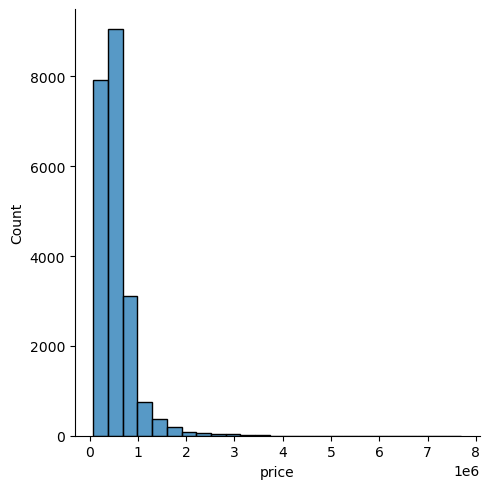

In [38]:
# Checking for extreme values
sns.displot(df['price'], bins=25) # Shows extreme values

In [39]:
df['price'].mean()

540088.1417665294

In [40]:
df['price'].median()

450000.0

In [41]:
df['price'].max()

7700000.0

In [42]:
df['price'].min()

75000.0

In [43]:
# Possible outliers. Most expensive houses may be removed from the model in the future.

# Hypothesis

## If the number of bedrooms is higher, the price of the home is also likely to be higher as well.

## Scatterplot

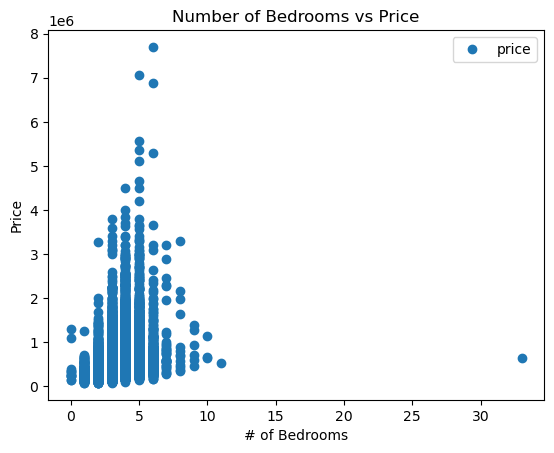

In [47]:
df.plot(x = 'bedrooms', y='price',style='o')
plt.title('Number of Bedrooms vs Price')  
plt.xlabel('# of Bedrooms')  
plt.ylabel('Price')  
plt.show()

Possible outlier. May be removed in the future.

# Creating test and training sets

In [50]:
# Reshaping price and bedrooms into NumPy arrays and putting them into separate objects

x = df['bedrooms'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [51]:
x

array([[3],
       [3],
       [2],
       ...,
       [2],
       [3],
       [2]], dtype=int64)

In [52]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [53]:
# Splitting data into a training set and a test set.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Regression analysis

In [55]:
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [56]:
regression.fit(x_train, y_train)

LinearRegression()

In [57]:
y_predicted = regression.predict(x_test)

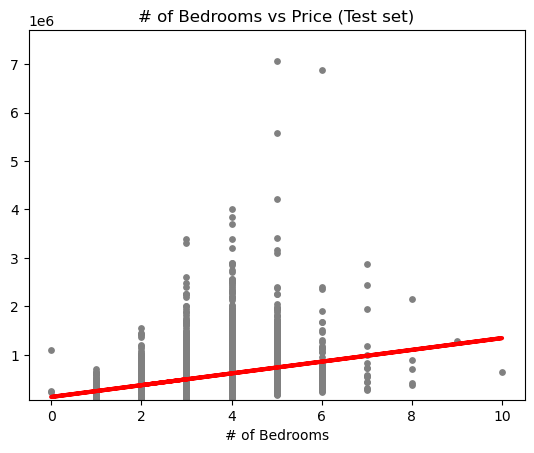

In [87]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(x_test, y_test, color='gray', s = 15)
plot_test.plot(x_test, y_predicted, color='red', linewidth =3)
plot_test.title('# of Bedrooms vs Price (Test set)')
plot_test.xlabel('# of Bedrooms')
## plot_test.ylabel('Price')
plot_test.ylim(top=7700000) #ymax is your value
plot_test.ylim(bottom=75000) #ymin is your value

plot_test.show()

In [174]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [176]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[121428.48144019]]
Mean squared error:  125281130975.90935
R2 score:  0.08748379287818542


## Interpretation:
## Positive Slope indicates the relationship between # of bedrooms and price is positive. This aligns with the hypothesis.
## MSE is very large, indicating the model is a poor fit.
## R2 of 0.09 is very small, indicating the model is a poor fit.

In [178]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,297000.0,374793.311516
1,1578000.0,617650.274396
2,562100.0,374793.311516
3,631500.0,374793.311516
4,780000.0,617650.274396
5,485000.0,496221.792956
6,340000.0,496221.792956
7,335606.0,496221.792956
8,425000.0,617650.274396
9,490000.0,739078.755837


# Seeing how our model fits the training set

In [183]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting x_train!

In [184]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [185]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[121428.48144019]]
Mean squared error:  120541090804.183
R2 score:  0.09840105216918593


## Very similar to the previous results. The model is not overfitted. There is a positive relationship between the two variables, but other variances in the data may determine home prices.

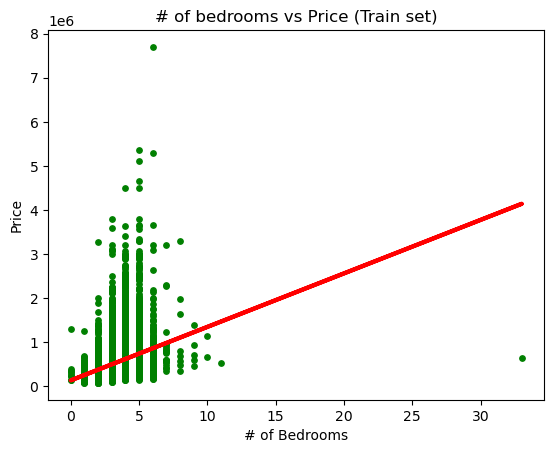

In [194]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(x_train, y_train, color='green', s = 15)
plot_test.plot(x_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('# of bedrooms vs Price (Train set)')
plot_test.xlabel('# of Bedrooms')
plot_test.ylabel('Price')
plot_test.show()